In [1]:
!git clone https://github.com/vandana2807/test.git

Cloning into 'test'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 11 (delta 0), reused 3 (delta 0), pack-reused 8
Unpacking objects: 100% (11/11), done.


In [2]:
!pip install dask

In [3]:
!pip install 'fsspec>=0.3.3'

     |████████████████████████████████| 132 kB 6.9 MB/s 


In [4]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import re

In [5]:
#reading the data
df = pd.read_csv("/content/test/test_data.tsv", sep='\t')
#in case the file is big
#df = dd.read_csv("/content/test/test_data.tsv", sep='\t')

In [6]:
#extracting data where there is no refund
df=df.loc[df['units']>0]
#extracting data where store id is 1 or 3
df=df.loc[(df['store_id']==1) | (df['store_id']==3)]
#taking only necessary columns
df=df[['product_name','store_id','product_id']]
df=df.reset_index(drop=True)

#for dask once all operations are done we call
df=df.compute()

In [7]:
#some preprocessing for 'product_name' columns 
for i in range(0,len(df)):
  z=re.sub(r"[^\w\s]", ' ', df.loc[i,'product_name'])
  df.loc[i,'product_name']=re.sub(r"\_|-"," ",z)

In [8]:
#check once for any duplications
np.unique(df['product_id']),np.unique(df['product_name'])

(array([0, 1, 2, 3, 4]),
 array(['bread 700g', 'coffee large', 'doughnut cold', 'milk 2L',
        'snickers 37g'], dtype=object))

In [9]:
#1st way
dt=df.groupby(['product_name', 'store_id'])['store_id'].sum().unstack().fillna(0)

Text(0.5, 1.0, 'sale_profiles_plot')

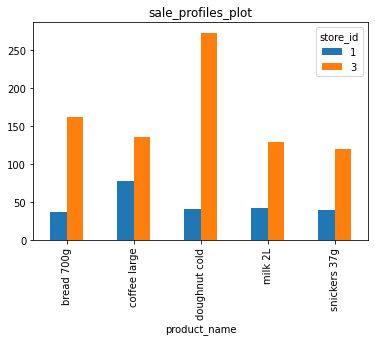

In [10]:
# Very simple one-liner using our dt DataFrame.
dt.plot(kind='bar')
# Just add a title and rotate the x-axis labels to be horizontal.
plt.title("sale_profiles_plot")

In [11]:
#second approach
s1=[]
s2=[]
for i in np.unique(df['product_name']):
  dt=df.loc[df['product_name']==i]
  s1.append(len(dt[dt['store_id']==1]))
  s2.append(len(dt[dt['store_id']==3]))
  #s1.append(len(dt.loc[(dt['product_name']==np.unique(dt['product_name'][i])) & (dt['store_id']==3)]))

In [12]:
plotdata = pd.DataFrame({
    "1":s1,
    "3":s2
    },
    index=list(np.unique(df['product_name']))
)

Text(0.5, 1.0, 'sale_profiles_plot')

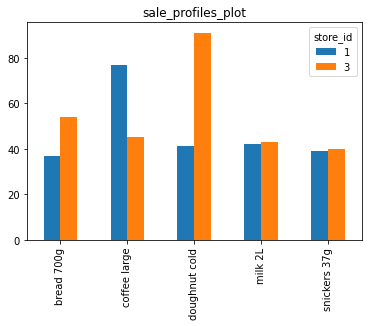

In [13]:
plotdata.plot(kind="bar")
plt.legend(title = "store_id")
plt.title("sale_profiles_plot")